In [5]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import PowerTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA

def loadData(dataDir, time = 500):
    dataset = np.load(dataDir)
    labels = dataset['arr_0'][:, :, 1:-1] # ignore the first row of labels (all 0)
    properties = dataset['arr_1']
    if time >= 0:
        x = properties[:, :, time]
        #y = labels[:, :, time]
    else:
        x = np.reshape(properties, [properties.shape[0], properties.shape[1] * properties.shape[2]])
        #y = np.reshape(labels, [labels.shape[0], labels.shape[1] * labels.shape[2]])
    y = labels[:, :, -1]
    return np.transpose(x), np.transpose(y)


# Data preporcessing
'loadData' function return the properties of the simulations as x, and corresponding stellar system labels as y.
* 'time' extract the slice of properties at certain time while 'time = -1' select all time with flattend format
* 'y' is set to select the labels of final time in the simulation
The properties are then go through preporcessing step, the yeo-johnson transformation is used to remove skewness and normalized the data ($\mu = 0$, $\sigma=0$)



0.17119264637634724
0.10102464632063585
-7.855351589328938e-16
0.9999999999999999


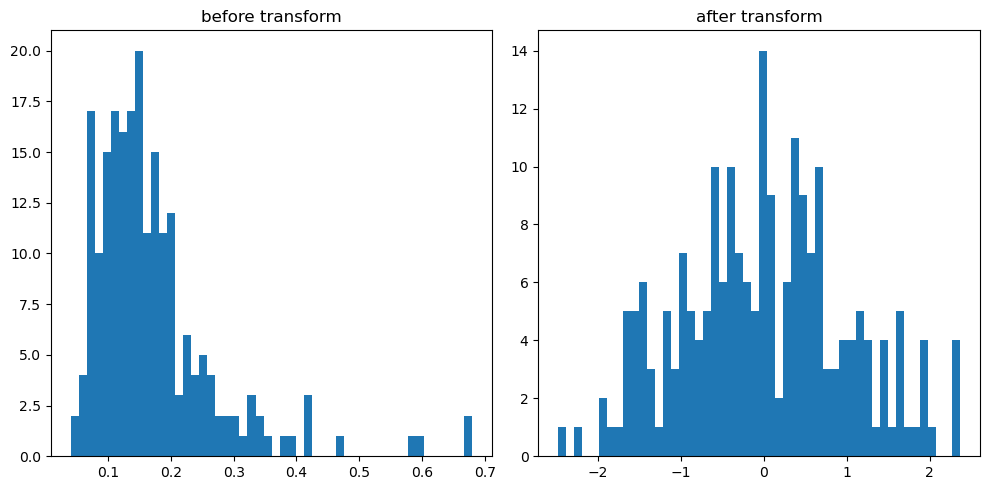

In [2]:
dataDir = '../data/dataset.npz'
x, y = loadData(dataDir, time = 20)
pt = PowerTransformer(method= 'yeo-johnson', standardize= True)
x_trans = pt.fit_transform(x)
# split training and testing dataset 
x_train, x_test, y_train, y_test = train_test_split(x_trans, y, train_size= 0.8)

fig1,ax1 = plt.subplots(1, 2, layout = 'tight', figsize = [10, 5])
p = 10
ax1[0].hist(x[:, p], bins = 50)
ax1[0].set_title('before transform')
ax1[1].hist(x_trans[:, p], bins = 50)
ax1[1].set_title('after transform')
print(np.mean(x[:, p]))
print(np.std(x[:, p]))
print(np.mean(x_trans[:, p]))
print(np.std(x_trans[:, p]))

# SVM
* SVM with radial bias function as kernel are used
* Test the accuracy on both train and test data set

In [3]:
svm_soft = SVC(kernel= 'rbf', C=1.0)
svm_soft.fit(x_train, y_train)
y_pred_test = svm_soft.predict(x_test)
y_pred_train = svm_soft.predict(x_train)
print("Train data accuracy:", metrics.accuracy_score(y_pred_train, y_train))
print("Test data accuracy:", metrics.accuracy_score(y_test, y_pred_test))



Train data accuracy: 0.7928994082840237
Test data accuracy: 0.7209302325581395


/Users/albertzhang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


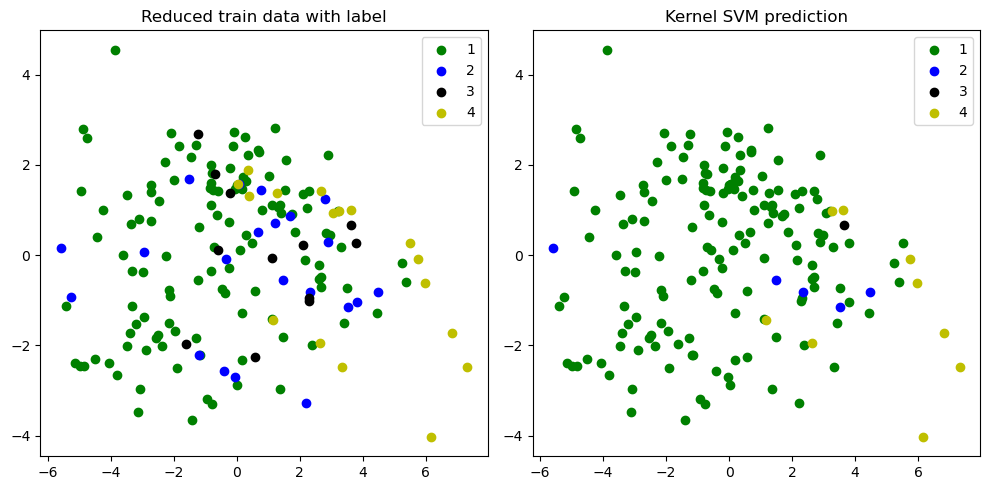

In [14]:
pca =PCA(n_components=2)
reducedX_train = pca.fit_transform(x_train)
fig2,ax2 = plt.subplots(1,2, layout = 'tight', figsize=[10, 5])

color = ['g', 'b', 'k', 'y']
# plot the data in the reduced dim
for i, j in enumerate(np.unique(y_train)):
    ax2[0].scatter(reducedX_train[np.ravel(y_train == j), 0], reducedX_train[np.ravel(y_train == j), 1], c = color[i], label = np.int32(j))
    ax2[1].scatter(reducedX_train[np.ravel(y_pred_train == j), 0], reducedX_train[np.ravel(y_pred_train == j), 1], c = color[i], label = np.int32(j))

ax2[0].set_title('Reduced train data with label')
ax2[1].set_title('Kernel SVM prediction')
ax2[0].legend()
ax2[1].legend()